In [1]:
from tensorflow.keras.layers import Input,Conv2D,MaxPool2D,concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

/Users/qin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


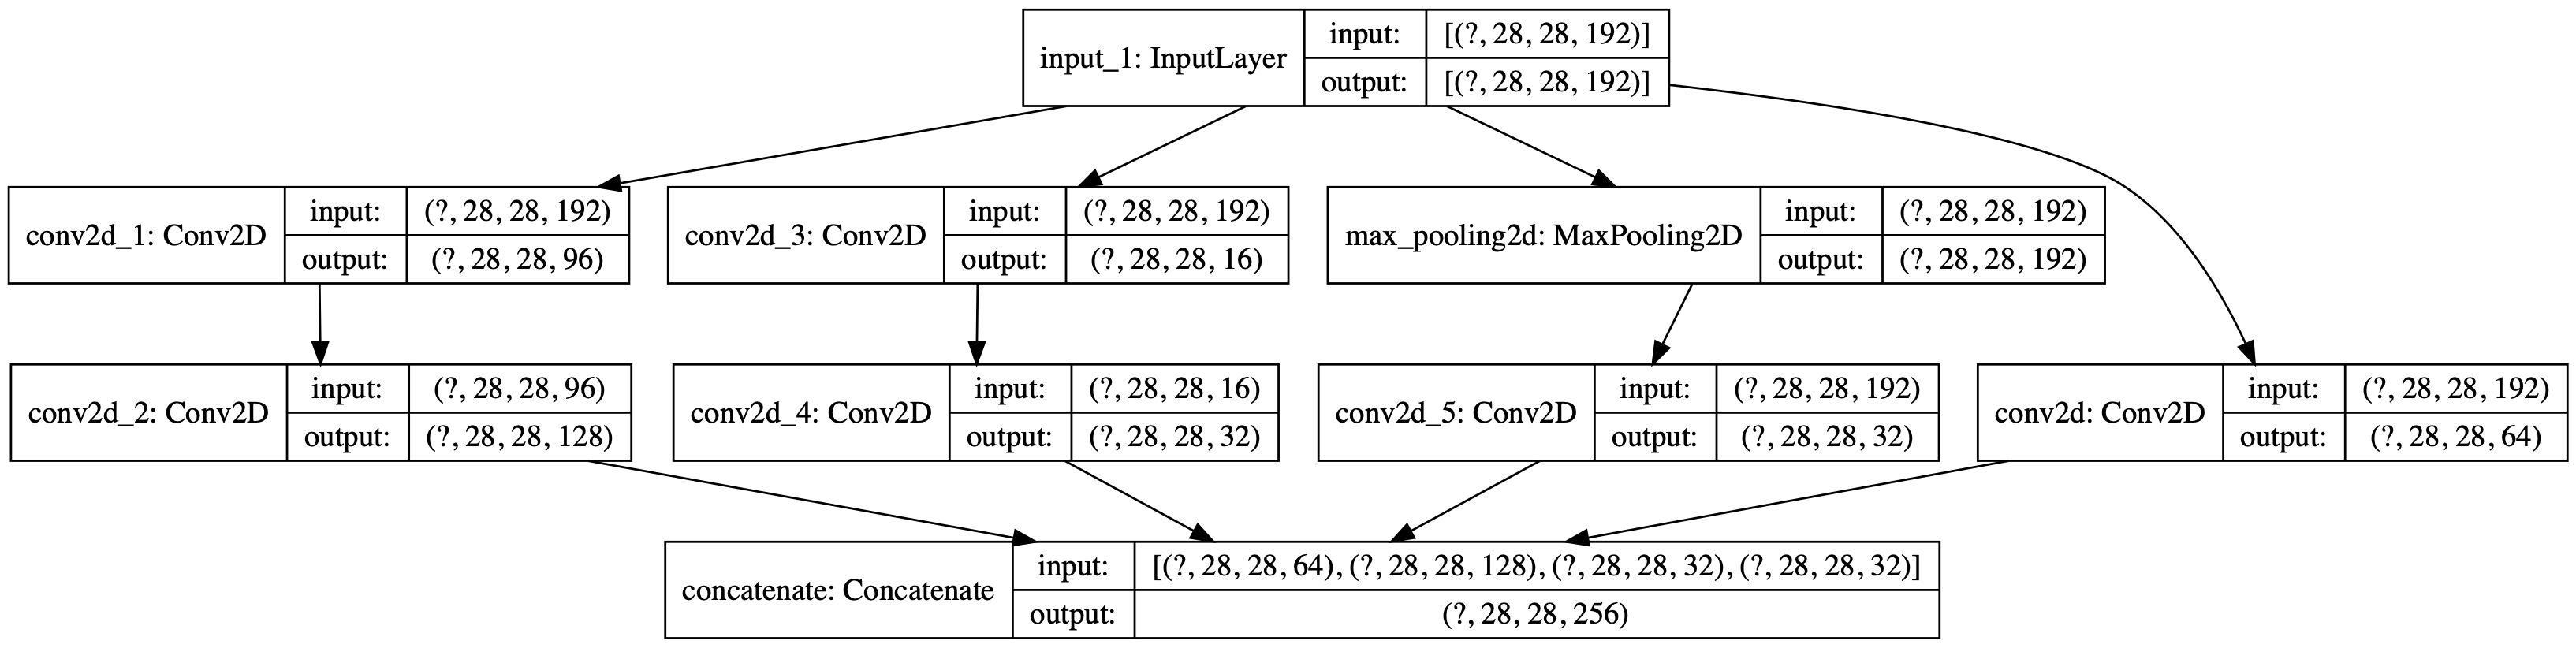

In [2]:
# 定义模型输入
inputs = Input(shape=(28,28,192))
tower_1 = Conv2D(filters=64,kernel_size=(1,1),strides=(1,1),padding='same',activation='relu')(inputs)
tower_2 = Conv2D(filters=96,kernel_size=(1,1),strides=(1,1),padding='same',activation='relu')(inputs)
tower_2 = Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu')(tower_2)
tower_3 = Conv2D(filters=16,kernel_size=(1,1),strides=(1,1),padding='same',activation='relu')(inputs)
tower_3 = Conv2D(filters=32,kernel_size=(5,5),strides=(1,1),padding='same',activation='relu')(tower_3)
pooling = MaxPool2D(pool_size=(3, 3),strides=(1, 1),padding='same')(inputs)
pooling = Conv2D(filters=32,kernel_size=(1,1),strides=(1,1),padding='same',activation='relu')(pooling)
# concatenate合并4个信号，axis=3表示根据channel进行合并，得到模型的输出
outputs = concatenate([tower_1,tower_2,tower_3,pooling],axis=3)
# 定义模型，设置输入和输出信号
model = Model(inputs=inputs, outputs=outputs)
# model表示要画图的模型
# 'model.png'表示图片存放路径
# show_shapes=True画出信号的shape
# dpi设置分辨率，200差不多就可以了
plot_model(model=model, to_file='model.png', show_shapes=True, dpi=200)